In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [15]:
df = pd.read_csv("Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
df.dropna(inplace = True)

In [19]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [20]:
X = df.drop(["price"],axis = 1)

In [21]:
y = df["price"]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
train_data = X_train.join(y_train)

In [24]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
428,4040,2,1,1,yes,no,no,no,no,1,no,unfurnished,3325000
429,4775,4,1,2,yes,no,no,no,no,0,no,unfurnished,3325000
348,3150,2,2,1,no,no,yes,no,no,0,no,semi-furnished,3815000
391,3036,3,1,2,yes,no,yes,no,no,0,no,semi-furnished,3500000
417,3640,2,1,1,yes,no,no,no,no,0,no,furnished,3395000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,3000,2,1,2,yes,no,no,no,yes,0,no,furnished,3640000
147,5500,3,2,2,yes,no,no,no,no,1,no,semi-furnished,5600000
422,3720,2,1,1,no,no,no,no,yes,0,no,unfurnished,3360000
210,4646,3,1,2,yes,yes,yes,no,no,2,no,semi-furnished,4900000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

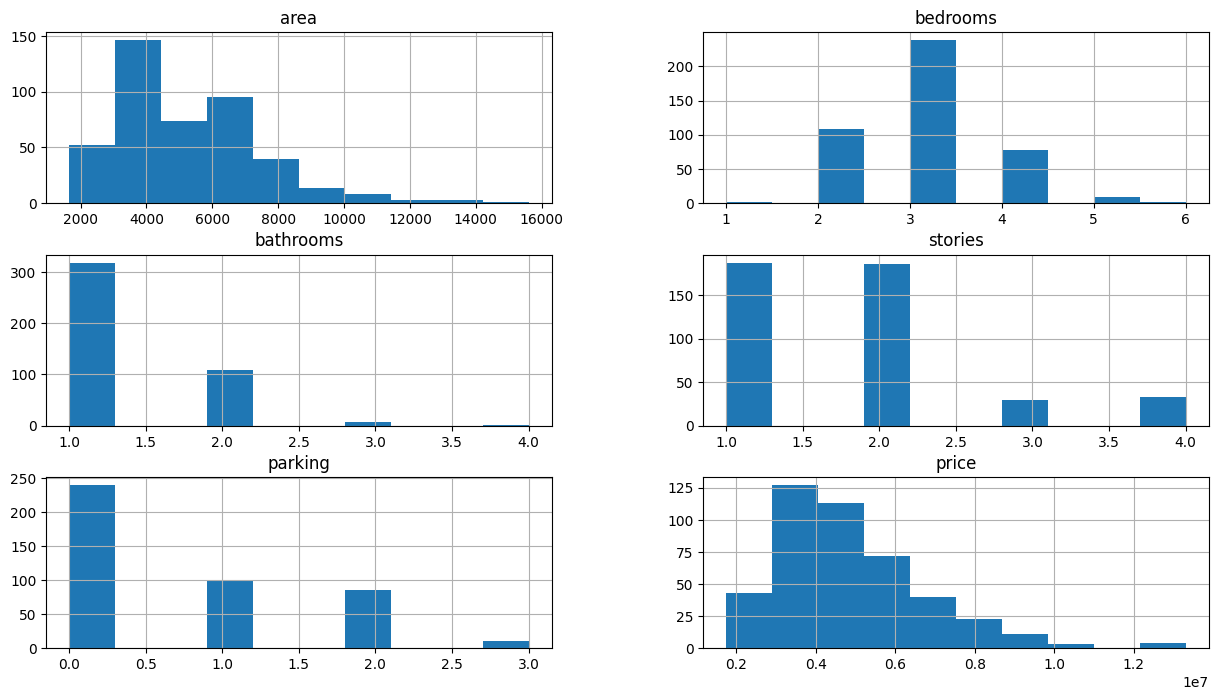

In [25]:
train_data.hist(figsize = (15,8))

In [26]:
train_data['bedrooms'] = np.log(train_data['bedrooms']+1)
train_data['bathrooms'] = np.log(train_data['bedrooms']+1)
train_data['stories'] = np.log(train_data['bedrooms']+1)
train_data['parking'] = np.log(train_data['bedrooms']+1)


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

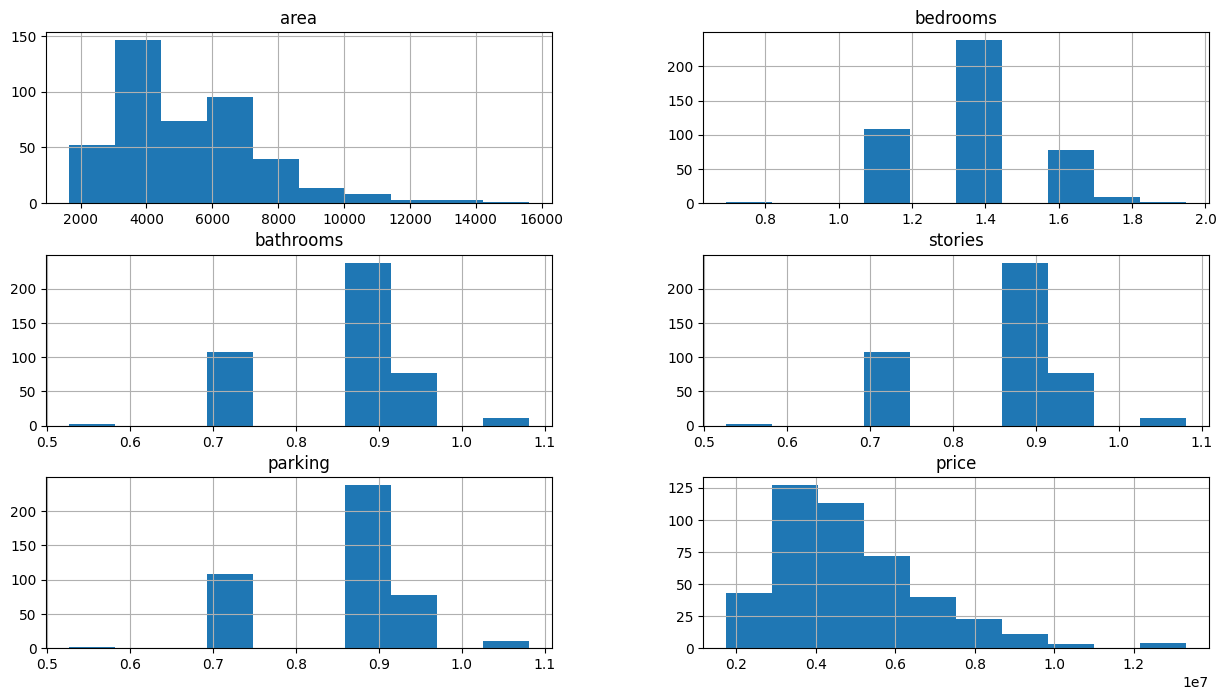

In [27]:
train_data.hist(figsize = (15,8))

In [28]:
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop(["furnishingstatus"], axis = 1)

In [29]:
mapping = {'yes': 1, 'no': 0}

In [30]:
train_data["mainroad_new"] = train_data["mainroad"].map(mapping)

train_data.drop(["mainroad"], axis = 1, inplace = True)

train_data

,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished,mainroad_new
428,4040,1.098612,0.741276,0.741276,no,no,no,no,0.741276,no,3325000,False,False,True,1
429,4775,1.609438,0.959135,0.959135,no,no,no,no,0.959135,no,3325000,False,False,True,1
348,3150,1.098612,0.741276,0.741276,no,yes,no,no,0.741276,no,3815000,False,True,False,0
391,3036,1.386294,0.869742,0.869742,no,yes,no,no,0.869742,no,3500000,False,True,False,1
417,3640,1.098612,0.741276,0.741276,no,no,no,no,0.741276,no,3395000,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,3000,1.098612,0.741276,0.741276,no,no,no,yes,0.741276,no,3640000,True,False,False,1
147,5500,1.386294,0.869742,0.869742,no,no,no,no,0.869742,no,5600000,False,True,False,1
422,3720,1.098612,0.741276,0.741276,no,no,no,yes,0.741276,no,3360000,False,False,True,0
210,4646,1.386294,0.869742,0.869742,yes,yes,no,no,0.869742,no,4900000,False,True,False,1


<Axes: >

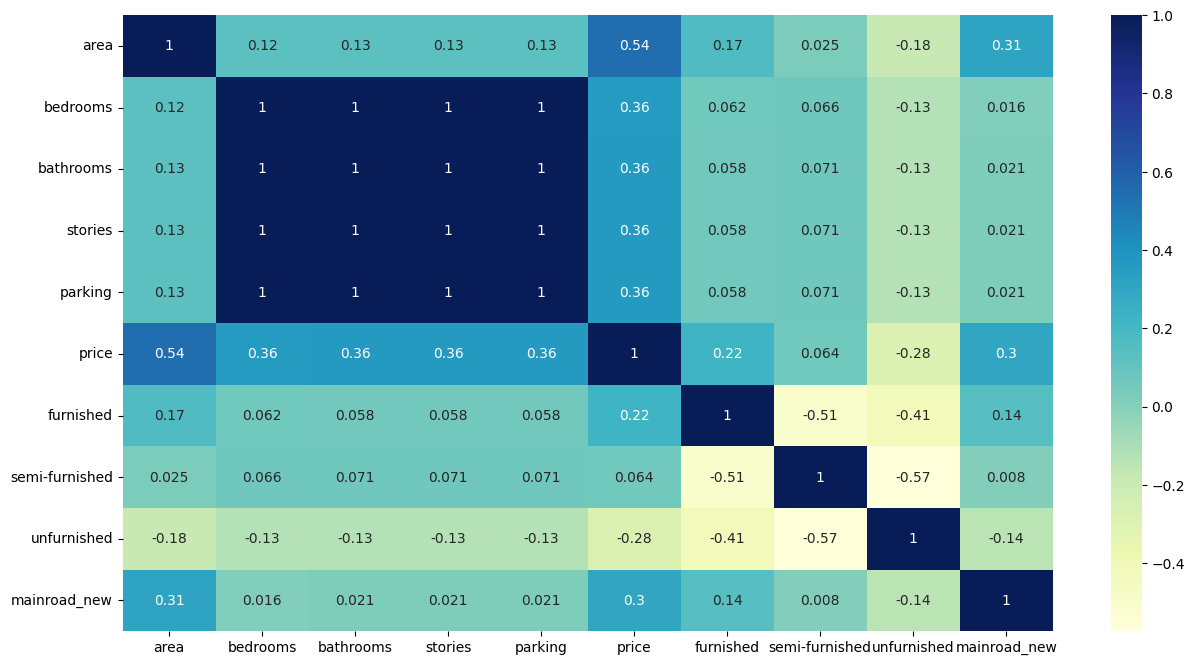

In [34]:
plt.figure(figsize =(15,8))
train_data_temp = train_data.drop(["airconditioning","hotwaterheating","guestroom","prefarea","basement"], axis = 1)
sns.heatmap(train_data_temp.corr(),annot = True, cmap = "YlGnBu")

In [36]:
X_train = train_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea",'basement'],axis = 1)
y_train = train_data["price"]

X_train

,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,unfurnished,mainroad_new
428,4040,1.098612,0.741276,0.741276,0.741276,False,False,True,1
429,4775,1.609438,0.959135,0.959135,0.959135,False,False,True,1
348,3150,1.098612,0.741276,0.741276,0.741276,False,True,False,0
391,3036,1.386294,0.869742,0.869742,0.869742,False,True,False,1
417,3640,1.098612,0.741276,0.741276,0.741276,True,False,False,1
...,...,...,...,...,...,...,...,...,...
373,3000,1.098612,0.741276,0.741276,0.741276,True,False,False,1
147,5500,1.386294,0.869742,0.869742,0.869742,False,True,False,1
422,3720,1.098612,0.741276,0.741276,0.741276,False,False,True,0
210,4646,1.386294,0.869742,0.869742,0.869742,False,True,False,1


In [37]:
y_train

428    3325000
429    3325000
348    3815000
391    3500000
417    3395000
        ...   
373    3640000
147    5600000
422    3360000
210    4900000
134    5803000
Name: price, Length: 436, dtype: int64

In [38]:

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
test_data = X_test.join(y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms']+1)
test_data['bathrooms'] = np.log(test_data['bedrooms']+1)
test_data['stories'] = np.log(test_data['bedrooms']+1)
test_data['parking'] = np.log(test_data['bedrooms']+1)

test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus)).drop(["furnishingstatus"], axis = 1)

mapping = {'yes': 1, 'no': 0}


test_data["mainroad_new"] = test_data["mainroad"].map(mapping)

test_data.drop(["mainroad"], axis = 1, inplace = True)

X_test = test_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea",'basement'],axis = 1)

y_test = test_data["price"]

In [40]:
y_pred = model.predict(X_test)

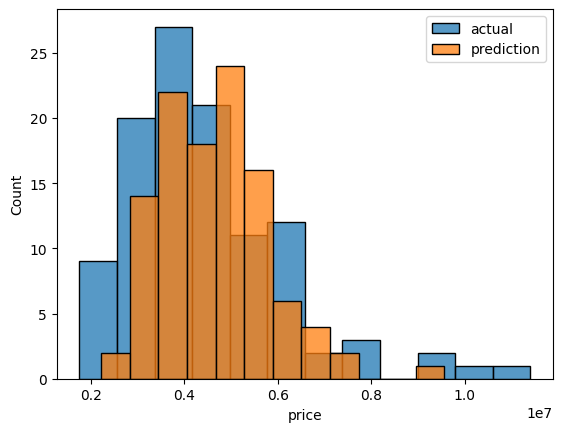

In [42]:
sns.histplot(y_test,label = "actual")
sns.histplot(y_pred,label = "prediction")
plt.legend()

In [43]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

1730986855654.4634


In [44]:
rmse = np.sqrt(mse)
print(rmse)

1315669.7365427478


In [45]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.44098520311345324


In [46]:
with open("models/lin_reg.bin", 'wb') as f_out:
    pickle.dump((model))

TypeError: dump() missing required argument 'file' (pos 2)